In [61]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("Feature_engin_treated.csv")

### Rapport profiling des features enginered

In [62]:

# Charger le dataset
df = pd.read_csv('Feature_engin_treated.csv')

# Générer le rapport de profiling
report = ProfileReport(df)

# Sauvegarder le rapport au format HTML
report.to_file('rapport_engin.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
df.head()

Customer ID        0
AverageAmount      0
TotalAmount        0
TimeDiff         138
R                  0
F                  0
M                  0
RFM                0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5942 non-null   float64
 1   AverageAmount  5942 non-null   float64
 2   TotalAmount    5942 non-null   float64
 3   TimeDiff       5791 non-null   float64
 4   R              5942 non-null   float64
 5   F              5942 non-null   float64
 6   M              5942 non-null   float64
 7   RFM            5942 non-null   float64
dtypes: float64(8)
memory usage: 371.5 KB


### Methode du coude

In [65]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

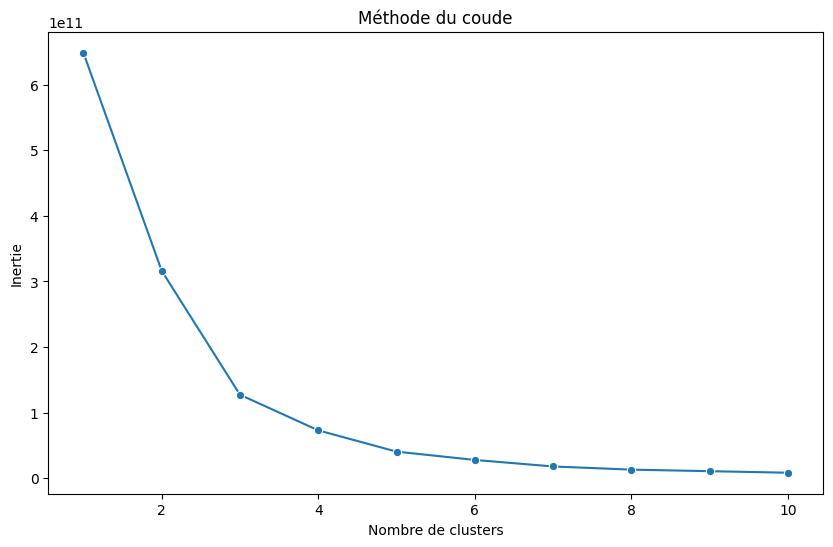

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertias, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()


### Clustering

In [67]:
df_cleansed = df.dropna()
df_cleansed.isna().sum()

Customer ID      0
AverageAmount    0
TotalAmount      0
TimeDiff         0
R                0
F                0
M                0
RFM              0
dtype: int64

In [4]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5791 entries, 0 to 5941
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5791 non-null   float64
 1   AverageAmount  5791 non-null   float64
 2   TotalAmount    5791 non-null   float64
 3   TimeDiff       5791 non-null   float64
 4   R              5791 non-null   float64
 5   F              5791 non-null   float64
 6   M              5791 non-null   float64
 7   RFM            5791 non-null   float64
dtypes: float64(8)
memory usage: 407.2 KB


In [108]:
df_cleansed.shape

(5272, 9)

In [109]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Charger le dataset


# Sélectionner les colonnes à utiliser pour le clustering
columns = ['AverageAmount', 'TotalAmount', 'TimeDiff', 'R', 'F', 'M', 'RFM']
data = df_cleansed[columns]

# Créer le pipeline de standardisation et clustering
pipeline = make_pipeline(StandardScaler(), KMeans(n_clusters=4, max_iter=100,random_state=42))

# Effectuer le clustering
pipeline.fit(data)

# Obtenir les labels de cluster pour chaque échantillon
labels = pipeline.predict(data)

# Ajouter les labels de cluster au DataFrame
df_cleansed['Cluster'] = labels

# Afficher le DataFrame avec les labels de cluster
# print(df_cleansed.head())





/tmp/ipykernel_9801/2458600017.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleansed['Cluster'] = labels


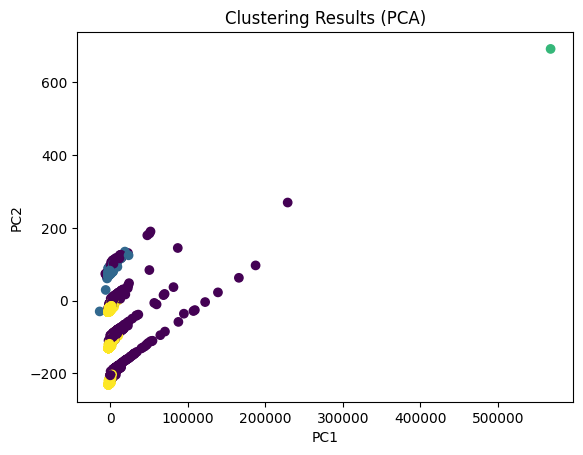

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results (PCA)')
plt.show()


In [165]:
df_try = df_cleansed

In [166]:
# Supprimer les lignes avec les valeurs spécifiques dans la colonne "TimeDiff"
df_try = df_try.drop(df_try[(df_try['Customer ID'] == 12918) | (df_try['Customer ID'] == 17013)].index)

# Réinitialiser les indices du DataFrame
df_try = df_try.reset_index(drop=True)


In [169]:
df_try.min()

Customer ID      12346.0
AverageAmount     -360.4
TotalAmount      -3767.2
TimeDiff             0.0
R                    1.0
F                    1.0
M                    1.0
RFM                111.0
Cluster              0.0
dtype: float64

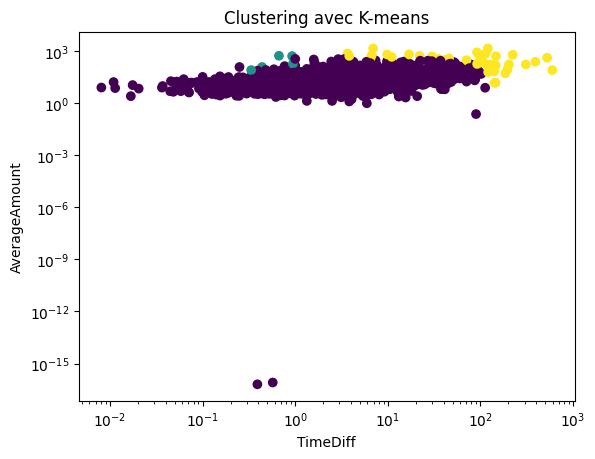

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le dataset
df = df_try

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['AverageAmount' ,'TotalAmount' ,'TimeDiff']]

# Appliquer la transformation de mise à l'échelle avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 3

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points
plt.scatter(df['TimeDiff'], df['AverageAmount'], c=df['Cluster'], cmap='viridis')
plt.xlabel('TimeDiff')
plt.ylabel('AverageAmount')
plt.title('Clustering avec K-means')
plt.xscale('log')
plt.yscale('log')
plt.show()

# reduction de dimensions sur une ACP

In [170]:


# Effectuer un groupby sur la colonne "Cluster"
df_grouped = df.groupby('Cluster').mean()

# Afficher le DataFrame résultant
df_grouped.head()


,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM
Cluster,,,,,,,,
0,15554.962857,21.069196,2284.678043,4.516702,1.780394,3.524794,3.599655,216.887038
1,16688.200000,291.385743,260357.174000,0.662201,3.800000,1.000000,1.200000,391.200000
2,16314.523810,427.371098,7044.198810,120.660271,1.761905,3.619048,3.761905,216.142857


In [171]:
df_cleansed.head()

,Customer ID,AverageAmount,TotalAmount,TimeDiff,R,F,M,RFM,Cluster
0,12346.0,-1.100851,-51.74,8.543478,1.0,2.0,3.0,123.0,0
1,12608.0,25.986875,415.79,0.000000,1.0,4.0,4.0,144.0,0
2,12745.0,32.902273,723.85,4.142857,1.0,4.0,4.0,144.0,0
3,12746.0,11.542500,230.85,10.631579,1.0,4.0,4.0,144.0,0
4,12747.0,34.188833,8786.53,2.816406,4.0,1.0,2.0,412.0,0


In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



df_pca = df_cleansed
# Sélectionner les colonnes pertinentes pour l'ACP
features = ['AverageAmount','TotalAmount', 'TimeDiff']

# Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca[features])

# Création de la matrice de corrélation
corr_matrix = pd.DataFrame(df_scaled, columns=features).corr()

# Calcul des composantes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Créer un DataFrame pour stocker les résultats de l'ACP
df_test = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Afficher les premières lignes du DataFrame résultant
df_test

,PC1,PC2
0,0.247692,-0.293254
1,0.223286,0.072196
2,0.030147,-0.068944
3,0.061713,-0.355541
4,-0.287882,0.508649
...,...,...
5267,0.318216,0.190657
5268,0.319669,0.070117
5269,0.135621,0.073501
5270,0.171353,-0.017064


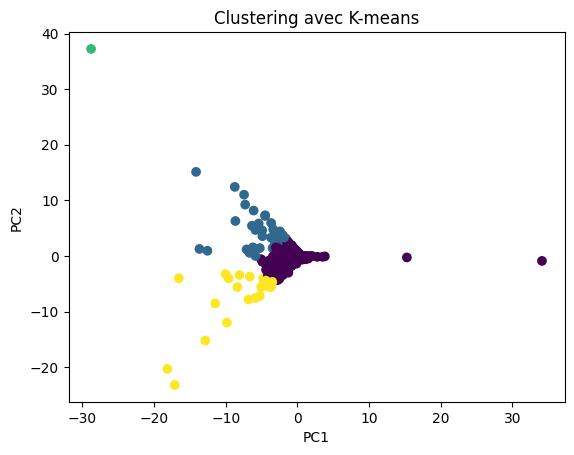

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger le dataset
df = df_test

# Sélectionner les colonnes à utiliser pour le clustering (R, F, M)
X = df[['PC1','PC2']]

# Appliquer la transformation de mise à l'échelle avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Définir le nombre de clusters
num_clusters = 4

# Créer une instance du modèle K-means avec une initialisation K-means++
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)

# Effectuer le clustering
kmeans.fit(X_scaled)

# Obtenir les labels de clusters assignés à chaque échantillon
labels = kmeans.labels_

# Ajouter les labels de clusters au DataFrame
df['Cluster'] = labels

# Visualiser les clusters en utilisant un diagramme en nuage de points
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering avec K-means')
# plt.xscale('log')
# plt.yscale('log')
plt.show()

In [140]:
# Effectuer un groupby sur la colonne "Cluster"
df_grouped = df_cleansed.groupby('Cluster').describe()

# Afficher le DataFrame résultant
df_grouped.head()

Customer ID                                                         \
              count          mean          std      min       25%      50%   
Cluster                                                                      
0            4130.0  15576.951574  1584.113639  12608.0  14209.00  15590.5   
1            1134.0  15504.798060  1565.670315  12346.0  14169.00  15519.5   
2               8.0  15862.750000  1861.995071  13089.0  14719.25  15997.5   

                           AverageAmount              ...     M          RFM  \
              75%      max         count        mean  ...   75%  max   count   
Cluster                                               ...                      
0        16947.75  18287.0        4130.0   24.513092  ...  4.00  4.0  4130.0   
1        16882.25  18283.0        1134.0   18.780510  ...  3.00  4.0  1134.0   
2        17465.25  18102.0           8.0  206.401317  ...  1.25  2.0     8.0   

                                                                    
               mean        std    min    25%    50%     75%    max  
Cluster                                                             
0        193.765375  79.686400  124.0  144.0  144.0  244.00  444.0  
1        300.419753  96.015188  111.0  232.0  322.0  411.00  443.0  
2        398.750000  35.459232  311.0  411.0  411.0  411.25  412.0  

[3 rows x 64 columns]

In [119]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5272 entries, 0 to 5409
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer ID    5272 non-null   float64
 1   AverageAmount  5272 non-null   float64
 2   TotalAmount    5272 non-null   float64
 3   TimeDiff       5272 non-null   float64
 4   R              5272 non-null   float64
 5   F              5272 non-null   float64
 6   M              5272 non-null   float64
 7   RFM            5272 non-null   float64
 8   Cluster        5272 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 391.3 KB
